In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# pip install seaborn --upgrade

In [3]:
train_df = pd.read_csv('../datasets/SA_same_ratio/train_dataset_ratio.csv')
test_df = pd.read_csv('../datasets/SA_same_ratio/test_dataset_ratio.csv')

In [4]:
Labels={
 0: "negative",
 1: "neutral",
 2: "positive",
}

In [5]:
train_df['label']=train_df['three_emo_0n1n2p']
train_df=train_df.replace({"label": Labels})
train_df

,text,Order,topic,topic_number,five_emo,three_emo_0n1n2p,three_emo_0n1n2p2,text_len,label
0,"stories with intrigue, character development ...",303,Narrative,53,2.0,0,2,7,negative
1,I also think it would be better if they devel...,136,Interaction and Socialisation,51,2.0,0,2,27,negative
2,the devs do not seem to have what it takes to...,318,Developer,43,2.0,0,2,17,negative
3,... we are discovering language of aliens but ...,450,Exploration,47,2.0,0,2,24,negative
4,"Being a difficult game it is,",726,Difficulty and Game Balance,44,2.0,0,2,6,negative
...,...,...,...,...,...,...,...,...,...
2172,When a player settles down on a planet and mak...,2930,Ownership,22,4.0,2,0,30,positive
2173,I'm sure it will be better after some time in ...,1548,Development states,37,2.0,0,2,12,negative
2174,"Gunfights are scary, loud, and you feel relie...",127,Survival mechanics,12,5.0,2,0,20,positive
2175,I enjoy going with a full team being commander...,1209,Interaction and Socialisation,51,5.0,2,0,28,positive


In [6]:
test_df['label']=test_df['three_emo_0n1n2p']
test_df=test_df.replace({"label": Labels})
test_df

,text,Order,topic,topic_number,five_emo,three_emo_0n1n2p,three_emo_0n1n2p2,text_len,label
0,"in addition, the developers made the game as a...",1554,Updates,60,3.0,1,1,79,neutral
1,as trolls will gladly make them inaccessible.,681,Interaction and Socialisation,51,1.0,0,2,7,negative
2,"l, kinda pricey too even after discount it jus...",1750,Price-quality ratio,38,2.0,0,2,14,negative
3,"There's still lots for me to discover for now,",2680,Exploration,47,5.0,2,0,9,positive
4,"you ""cannot"" talk about this game and not talk...",3032,Novelty,54,2.0,0,2,61,negative
...,...,...,...,...,...,...,...,...,...
929,still knows it's a GAME and is firmly focused ...,2240,Engaging Gameplay,46,5.0,2,0,19,positive
930,Sometimes the 'profanity' filter disallows som...,2213,Content filter,16,2.0,0,2,50,negative
931,"the sound for this game is really good, guns f...",2568,Audio,39,5.0,2,0,30,positive
932,The hostages are governed by some of the worst...,2461,Interaction and Socialisation,51,1.0,0,2,85,negative


In [7]:
analyzer = SentimentIntensityAnalyzer()


In [8]:
# Function to classify sentiment using VADER
def classify_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)
    compound_score = sentiment_score['compound']
    
    if compound_score >= 0.05:
        return 2  # Positive
    elif compound_score <= -0.05:
        return 0  # Negative
    else:
        return 1  # Neutral

In [9]:
# Apply classification to train and test datasets
train_df['predicted_label'] = train_df['text'].apply(classify_sentiment)
test_df['predicted_label'] = test_df['text'].apply(classify_sentiment)

In [10]:
# Encode labels to match VADER's output
label_encoder = LabelEncoder()
train_df['label'] = label_encoder.fit_transform(train_df['label'])
test_df['label'] = label_encoder.transform(test_df['label'])

In [11]:
# Evaluate the model (test)
accuracy = accuracy_score(test_df['label'], test_df['predicted_label'])
precision = precision_score(test_df['label'], test_df['predicted_label'], average='weighted')
f1 = f1_score(test_df['label'], test_df['predicted_label'], average='weighted')

In [12]:
# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.5514
Precision: 0.5911
F1 Score: 0.5559


In [13]:
# Evaluate the model (train)
accuracy = accuracy_score(train_df['label'], train_df['predicted_label'])
precision = precision_score(train_df['label'], train_df['predicted_label'], average='weighted')
f1 = f1_score(train_df['label'], train_df['predicted_label'], average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.5613
Precision: 0.5997
F1 Score: 0.5682


In [14]:
# Generate confusion matrix
conf_matrix = confusion_matrix(test_df['label'], test_df['predicted_label'])

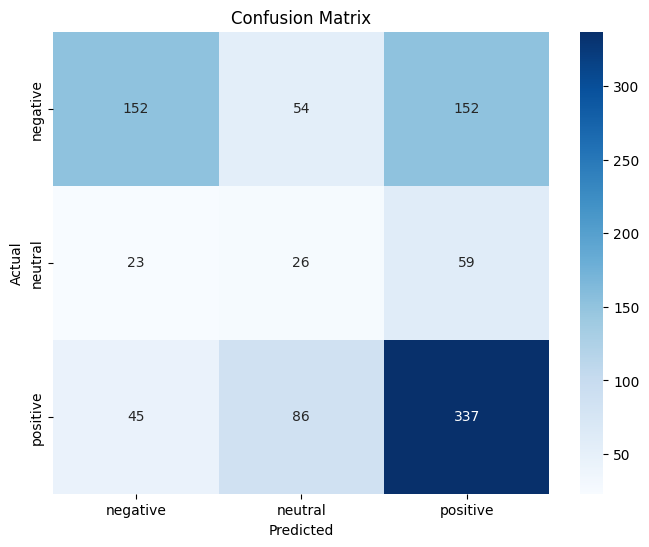

In [15]:
# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Generate confusion matrix
conf_matrix_train = confusion_matrix(train_df['label'], train_df['predicted_label'])

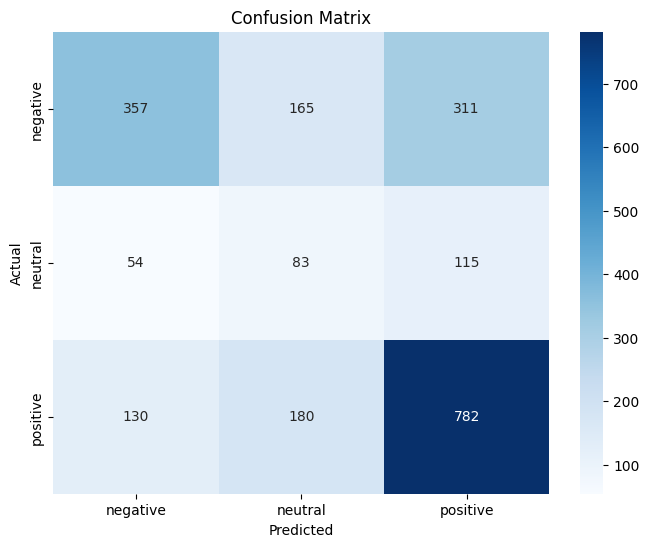

In [17]:
# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()